# *This file allows to generate all plots necessary for figures*

# **Useful packages and functions**

In [1]:
using DifferentialEquations, Plots, Polynomials, LaTeXStrings, ColorSchemes, DelimitedFiles, DataFrames
using Statistics, StatsPlots, Random, ProgressMeter, Printf, LinearAlgebra, Plots.PlotMeasures
include("DA_kinetics.jl") # Loading of DA kinetics of gating variables
include("DA_models.jl") # Loading of DA model
include("DA_utils.jl"); # Loading of some utils functions

# **Global variables**

In [2]:
# Definition of simulation time (in ms)
const Tfinal = 1000000
const tspan  = (0.0, Tfinal)
tt = 0. : 0.01 : Tfinal
tt_rand = 0. : 1 : Tfinal
tt_plot = 0. : 0.01 : 20000.

# Definition of reversal potential values (in mV), [Mg] and membrane capacitance
const VNa     = 60. # Sodium reversal potential
const VK      = -90. # Potassium reversal potential
const VCa     = 50. # Calcium reversal potential
const VH      = -29. # H reversal potential
const VLNS    = -65. # Leak reversal potential
const EPacemaker = 4.2732015978991615 # Reversal potential of pacemaking channels

const C       = 1. # Membrane capacitance
const fCa     = 0.018 # Fraction of unbuffered free calcium
const ICapmax = 11 # Maximum calcium pump current
const F       = 96520 # Faraday constant in ms*µA/mmol (and taking cm³=mL)
const d       = 15 # Soma diameter in cm
const L       = 25 # Soma length

# Definition of voltage range for the DICs
const Vmin = -100 
const Vmax = 50
const Vrange = range(Vmin, stop=Vmax, step=0.0154640);

In [3]:
# Modifying backend GR attributes
gr(guidefontsize=25, tickfontsize=15, legendfontsize=12, margin=5Plots.mm, grid=false)
myApple = RGBA(187/255, 206/255, 131/255, 1)
mySalmon = RGBA(243/255, 124/255, 130/255)
myYellow = RGBA(228/255, 205/255, 121/255, 1)
myBlue = RGBA(131/255, 174/255, 218/255, 1)
myDarkBlue = RGBA(114/255, 119/255, 217/255, 1)
myOrange = RGBA(241/255, 175/255, 113/255, 1)
myPink = RGBA(243/255, 124/255, 130/255, 1)
myPurple = RGBA(169/255, 90/255, 179/255, 1)
myGreen = RGBA(132/255, 195/255, 168/255, 1)
myRed = RGBA(158/255, 3/255, 8/255, 1)
myGray = RGBA(150/255, 150/255, 150/255, 1)
myLightBlue = RGBA(127/255, 154/255, 209/255, 1);
default(fmt = :png);

In [4]:
# Define a struct (optional, but useful if you need parameters)
struct NoisyFunction
    amplitude::Float64  # amplitude of the noise
end

# Overload the () operator to make the struct callable
function (nf::NoisyFunction)(x::Float64)
    noise = nf.amplitude * randn()  # Generate Gaussian noise (mean 0, std 1)
    return noise  # Example function with noise
end

function condition(u,t,integrator) # Event when event_f(u,t) == 0
  (u[1]- (-20.))
end

function affect!(integrator)
end

cb = ContinuousCallback(condition, affect!, nothing, save_positions = (true, false));

# Simu noisy model instantaneous Na Kd only

In [30]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 0#1.68 # A-type potassium current maximal conductance
# gKERG      = 0#0.13 # ERG current maximal conductance
# gKSK       = 0#0.07 # SK current maximal conductance
# gH         = 0#0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0#0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solNaKd = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [32]:
# ISIs_NaKd = zeros(length(solNaKd.t)-1)
# for i = 1 : length(solNaKd.t) - 1
#     ISIs_NaKd[i] = solNaKd.t[i+1] - solNaKd.t[i]
# end
# writedlm("./data/ISIs_NaKd.dat", ISIs_NaKd);

# Simu noisy model instantaneous with SK

In [72]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 0#1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0#0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solSK = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [73]:
# ISIs_SK = zeros(length(solSK.t)-1)
# for i = 1 : length(solSK.t) - 1
#     ISIs_SK[i] = solSK.t[i+1] - solSK.t[i]
# end
# writedlm("./data/ISIs_SK.dat", ISIs_SK);

# Simu noisy model instantaneous with H

In [70]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 0#1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0#0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solH = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [71]:
# ISIs_H = zeros(length(solH.t)-1)
# for i = 1 : length(solH.t) - 1
#     ISIs_H[i] = solH.t[i+1] - solH.t[i]
# end
# writedlm("./data/ISIs_H.dat", ISIs_H);

# Simu noisy model instantaneous with A

In [68]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0#0.07 # SK current maximal conductance
# gH         = 0#0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solA = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [69]:
# ISIs_A = zeros(length(solA.t)-1)
# for i = 1 : length(solA.t) - 1
#     ISIs_A[i] = solA.t[i+1] - solA.t[i]
# end
# writedlm("./data/ISIs_A.dat", ISIs_A);

# Simu noisy model instantaneous with H and A

In [46]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0#0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solHA = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [47]:
# ISIs_HA = zeros(length(solHA.t)-1)
# for i = 1 : length(solHA.t) - 1
#     ISIs_HA[i] = solHA.t[i+1] - solHA.t[i]
# end
# writedlm("./data/ISIs_HA.dat", ISIs_HA);

# Simu noisy model instantaneous with H and SK

In [53]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 0#1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solHSK = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [55]:
# ISIs_HSK = zeros(length(solHSK.t)-1)
# for i = 1 : length(solHSK.t) - 1
#     ISIs_HSK[i] = solHSK.t[i+1] - solHSK.t[i]
# end
# writedlm("./data/ISIs_HSK.dat", ISIs_HSK);

# Simu noisy model instantaneous with A and SK

In [59]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0#0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solASK = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [67]:
# ISIs_ASK = zeros(length(solASK.t)-1)
# for i = 1 : length(solASK.t) - 1
#     ISIs_ASK[i] = solASK.t[i+1] - solASK.t[i]
# end
# writedlm("./data/ISIs_ASK.dat", ISIs_ASK);

# Simu noisy model instantaneous with all

In [66]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance
# gPacemaker = 5 # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensity = 20
# p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)

# # Initial conditions
# V0 = 0.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# # Simulation
# prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
# solAHSK = solve(prob; maxiters=1e9, callback=cb,save_everystep=false,save_start=false,save_end=false);

In [65]:
# ISIs_AHSK = zeros(length(solAHSK.t)-1)
# for i = 1 : length(solAHSK.t) - 1
#     ISIs_AHSK[i] = solAHSK.t[i+1] - solAHSK.t[i]
# end
# writedlm("./data/ISIs_AHSK.dat", ISIs_AHSK);

# Plotting ISIs

In [115]:
ISIs_NaKd = readdlm("./data/ISIs_NaKd.dat")
ISIs_SK = readdlm("./data/ISIs_SK.dat")
ISIs_A = readdlm("./data/ISIs_A.dat")
ISIs_H = readdlm("./data/ISIs_H.dat")
ISIs_HA = readdlm("./data/ISIs_HA.dat")
ISIs_ASK = readdlm("./data/ISIs_ASK.dat")
ISIs_HSK = readdlm("./data/ISIs_HSK.dat")
ISIs_AHSK = readdlm("./data/ISIs_AHSK.dat")

# ISIs_NaKd = ISIs_NaKd ./ maximum(ISIs_NaKd)
ISIs_NaKd = vec(ISIs_NaKd)
# ISIs_SK = ISIs_SK ./ maximum(ISIs_SK)
ISIs_SK = vec(ISIs_SK)
# ISIs_A = ISIs_A ./ maximum(ISIs_A)
ISIs_A = vec(ISIs_A)
# ISIs_H = ISIs_H ./ maximum(ISIs_H)
ISIs_H = vec(ISIs_H)
# ISIs_HA = ISIs_HA ./ maximum(ISIs_HA)
ISIs_HA = vec(ISIs_HA)
# ISIs_ASK = ISIs_ASK ./ maximum(ISIs_ASK)
ISIs_ASK = vec(ISIs_ASK)
# ISIs_HSK = ISIs_HSK ./ maximum(ISIs_HSK)
ISIs_HSK = vec(ISIs_HSK)
# ISIs_AHSK = ISIs_AHSK ./ maximum(ISIs_AHSK)
ISIs_AHSK = vec(ISIs_AHSK);

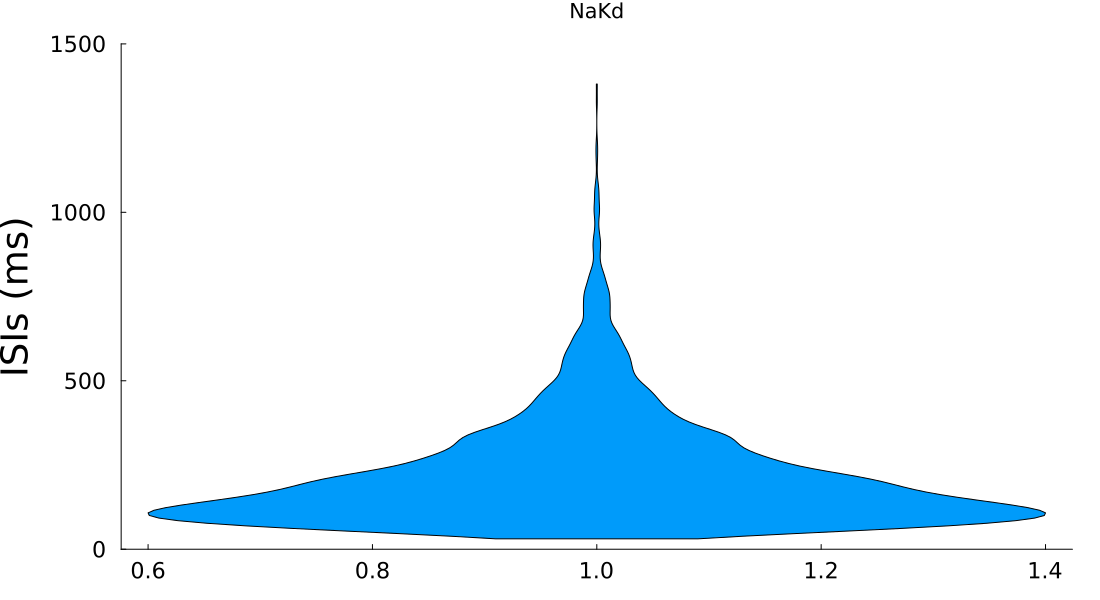

In [104]:
violin(ISIs_NaKd, side="both", title="NaKd", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

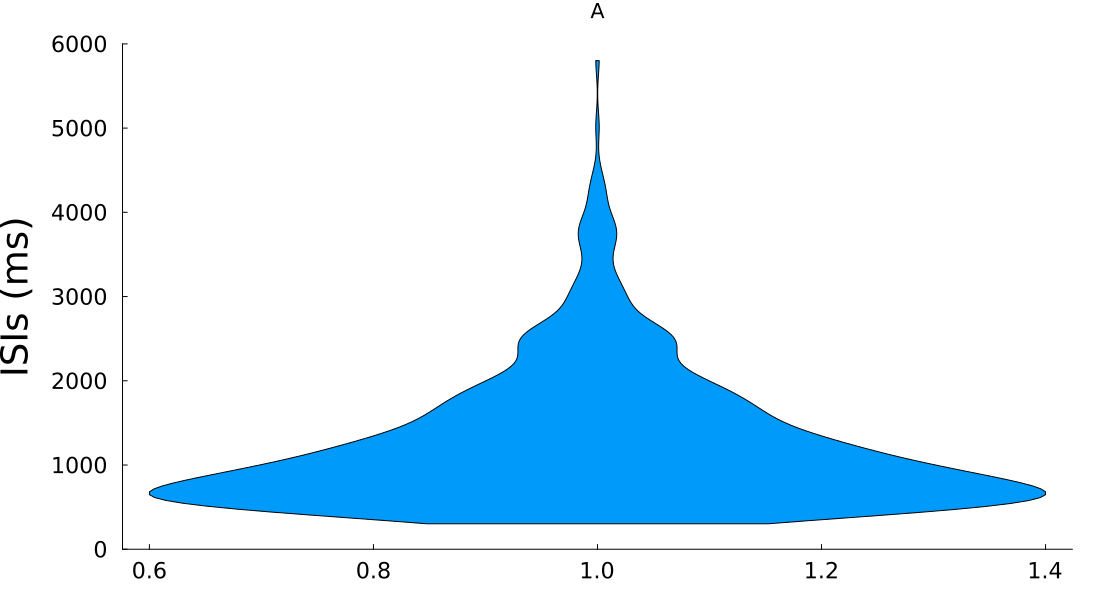

In [105]:
violin(ISIs_A, side="both", title="A", size=(1100, 600), legend=false, ylims=(0, 6000))
ylabel!("ISIs (ms)")

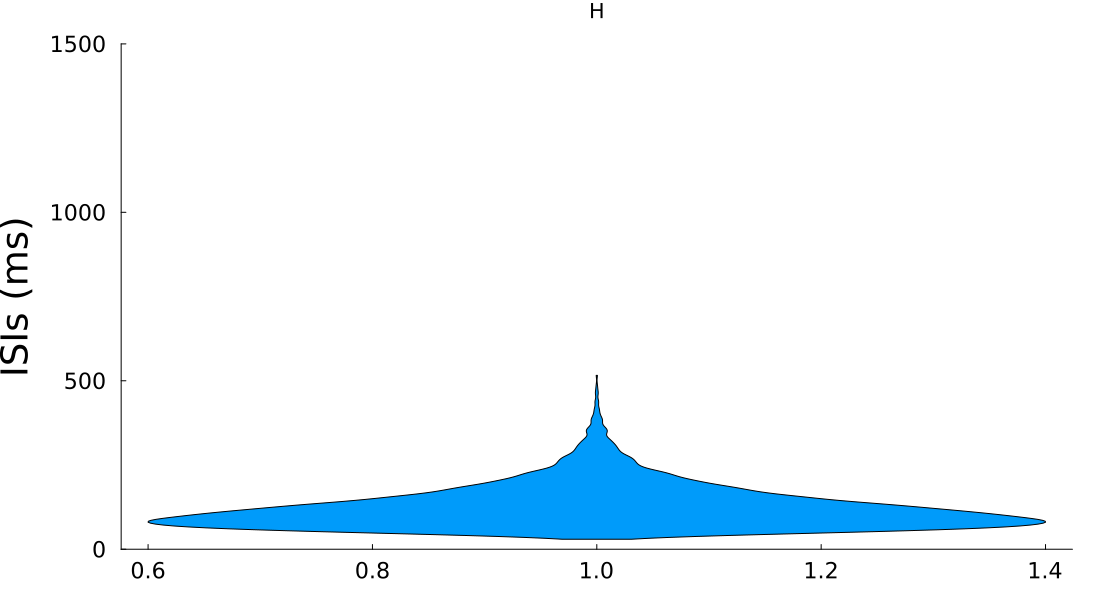

In [106]:
violin(ISIs_H, side="both", title="H", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

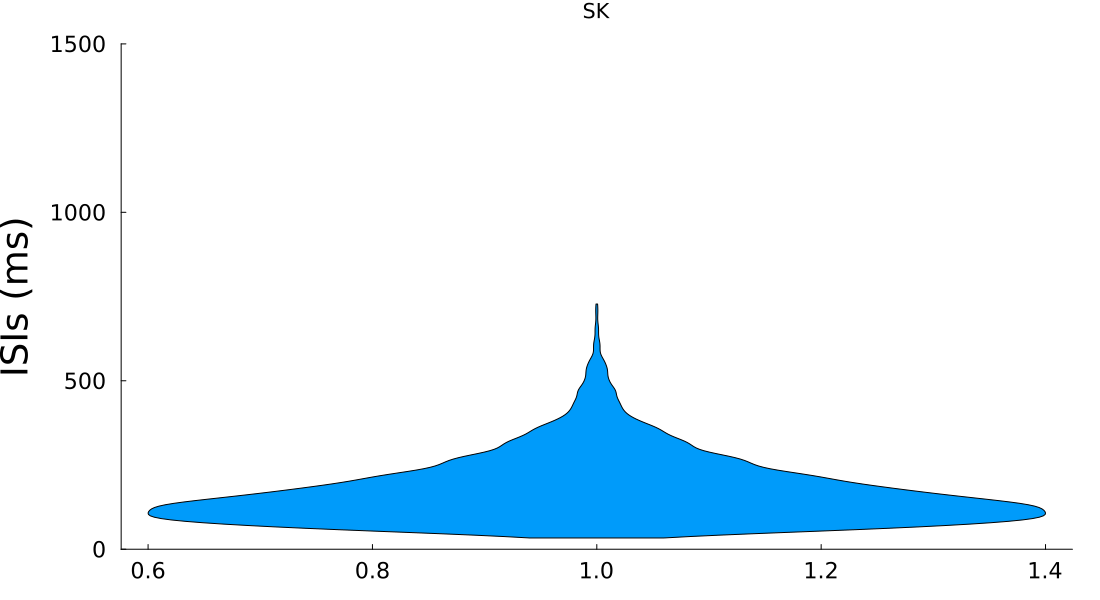

In [107]:
violin(ISIs_SK, side="both", title="SK", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

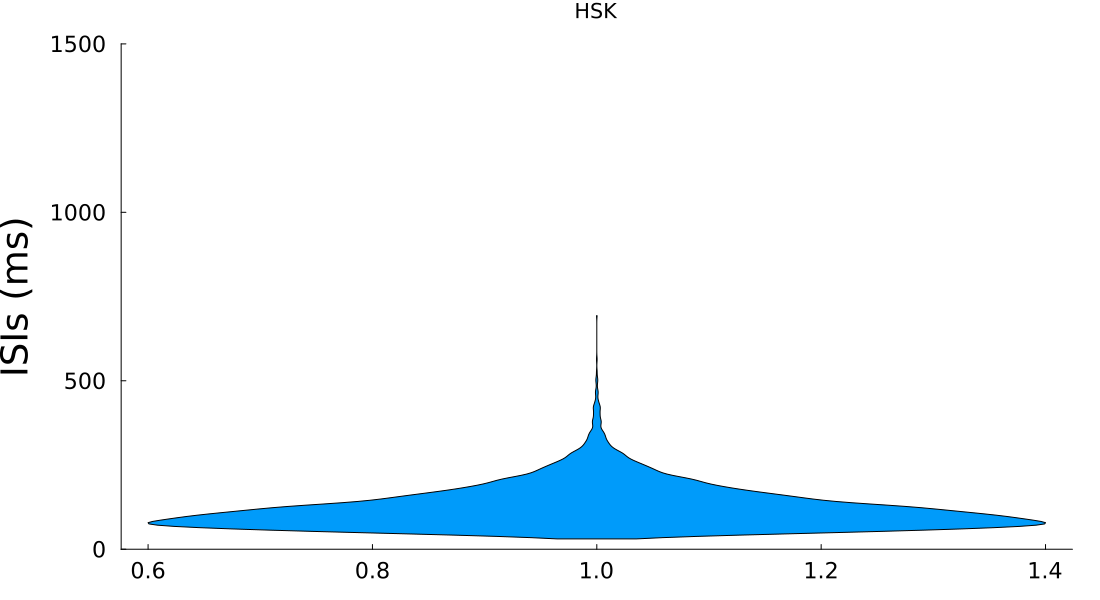

In [108]:
violin(ISIs_HSK, side="both", title="HSK", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

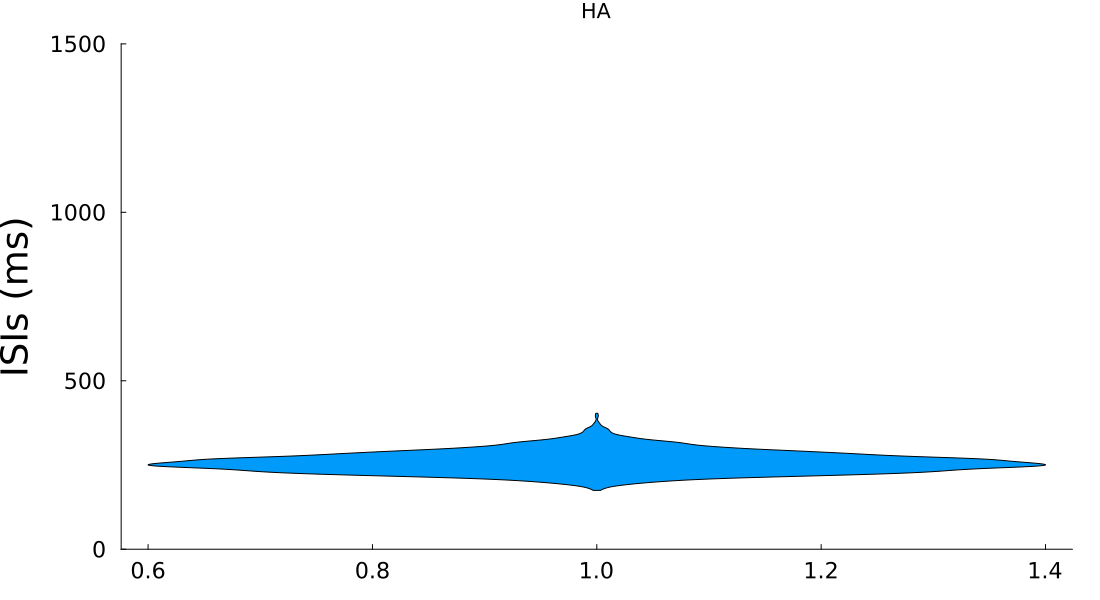

In [109]:
violin(ISIs_HA, side="both", title="HA", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

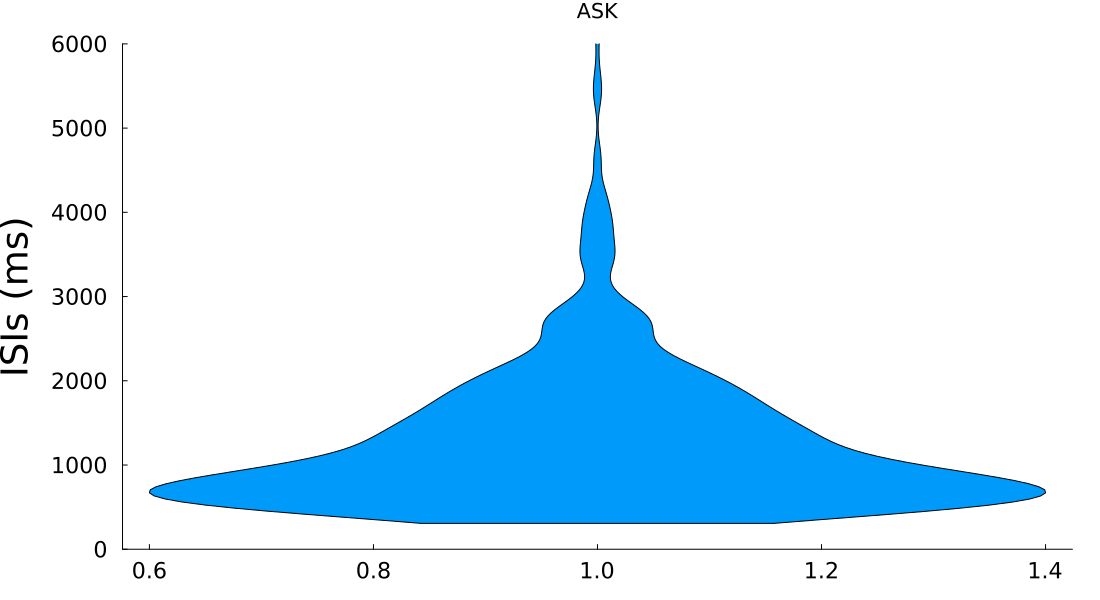

In [110]:
violin(ISIs_ASK, side="both", title="ASK", size=(1100, 600), legend=false, ylims=(0, 6000))
ylabel!("ISIs (ms)")

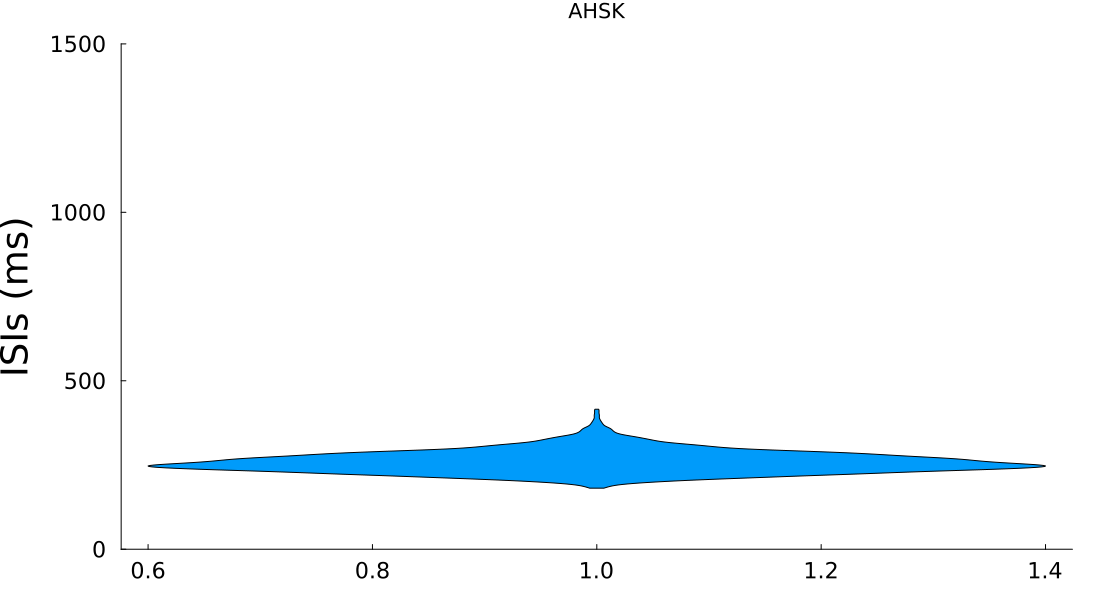

In [111]:
violin(ISIs_AHSK, side="both", title="AHSK", size=(1100, 600), legend=false, ylims=(0, 1500))
ylabel!("ISIs (ms)")

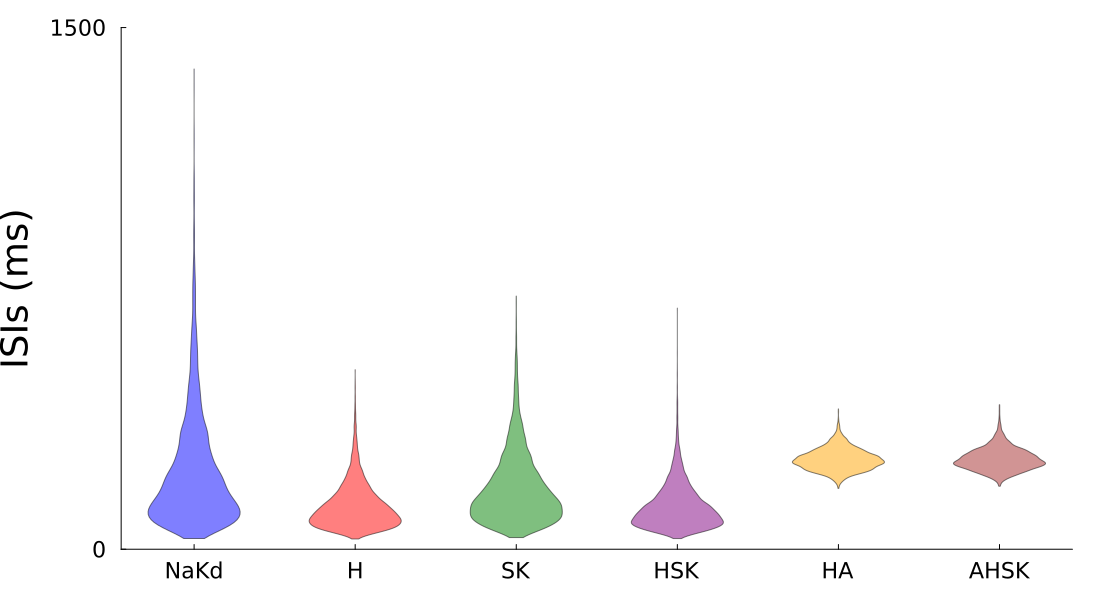

In [116]:
# Create a DataFrame to organize the data for plotting
df = DataFrame(
    group = vcat(repeat(["NaKd"], length(ISIs_NaKd)),
                 repeat(["H"], length(ISIs_H)),
                 repeat(["SK"], length(ISIs_SK)),
                 repeat(["HSK"], length(ISIs_HSK)),
                 repeat(["HA"], length(ISIs_HA)),
                 repeat(["AHSK"], length(ISIs_AHSK))),
    values = vcat(ISIs_NaKd, ISIs_H, ISIs_SK, ISIs_HSK, ISIs_HA, ISIs_AHSK)
)

# Define colors manually for each dataset
colors = [:blue, :red, :green, :purple, :orange, :brown]

# Plot the violin plots, superposing them for comparison
p = violin(df[df.group .== "NaKd", :group], df[df.group .== "NaKd", :values], side="both", color=colors[1], alpha=0.5, legend=false, size=(1100, 600))

# Loop through remaining datasets and overlay violin plots
for (i, dataset) in enumerate(["H", "SK", "HSK", "HA", "AHSK"])
    violin!(df[df.group .== dataset, :group], df[df.group .== dataset, :values], side="both", color=colors[i+1], alpha=0.5, legend=false)
end

ylims!((0., 1500.))
yticks!([0., 1500.])

ylabel!("ISIs (ms)")

# Display the plot
display(p)

In [117]:
ISIs_NaKd_norm = ISIs_NaKd ./ maximum(ISIs_NaKd)
ISIs_NaKd_norm = vec(ISIs_NaKd_norm)
ISIs_SK_norm = ISIs_SK ./ maximum(ISIs_SK)
ISIs_SK_norm = vec(ISIs_SK_norm)
ISIs_A_norm = ISIs_A ./ maximum(ISIs_A)
ISIs_A_norm = vec(ISIs_A_norm)
ISIs_H_norm = ISIs_H ./ maximum(ISIs_H)
ISIs_H_norm = vec(ISIs_H_norm)
ISIs_HA_norm = ISIs_HA ./ maximum(ISIs_HA)
ISIs_HA_norm = vec(ISIs_HA_norm)
ISIs_ASK_norm = ISIs_ASK ./ maximum(ISIs_ASK)
ISIs_ASK_norm = vec(ISIs_ASK_norm)
ISIs_HSK_norm = ISIs_HSK ./ maximum(ISIs_HSK)
ISIs_HSK_norm = vec(ISIs_HSK_norm)
ISIs_AHSK_norm = ISIs_AHSK ./ maximum(ISIs_AHSK)
ISIs_AHSK_norm = vec(ISIs_AHSK_norm);

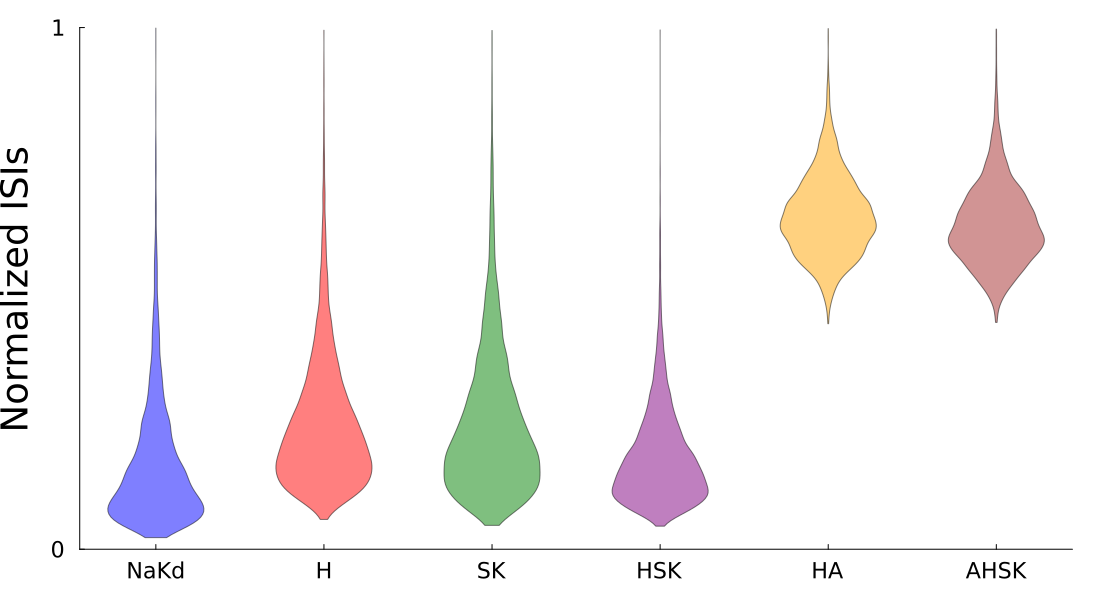

In [120]:
# Create a DataFrame to organize the data for plotting
df_norm = DataFrame(
    group = vcat(repeat(["NaKd"], length(ISIs_NaKd_norm)),
                 repeat(["H"], length(ISIs_H_norm)),
                 repeat(["SK"], length(ISIs_SK_norm)),
                 repeat(["HSK"], length(ISIs_HSK_norm)),
                 repeat(["HA"], length(ISIs_HA_norm)),
                 repeat(["AHSK"], length(ISIs_AHSK_norm))),
    values = vcat(ISIs_NaKd_norm, ISIs_H_norm, ISIs_SK_norm, ISIs_HSK_norm, ISIs_HA_norm, ISIs_AHSK_norm)
)

# Define colors manually for each dataset
colors = [:blue, :red, :green, :purple, :orange, :brown]

# Plot the violin plots, superposing them for comparison
p = violin(df_norm[df_norm.group .== "NaKd", :group], 
           df_norm[df_norm.group .== "NaKd", :values], 
           side="both", color=colors[1], alpha=0.5, legend=false, size=(1100, 600))

# Loop through remaining datasets and overlay violin plots
for (i, dataset) in enumerate(["H", "SK", "HSK", "HA", "AHSK"])
    violin!(df_norm[df_norm.group .== dataset, :group], 
            df_norm[df_norm.group .== dataset, :values], 
            side="both", color=colors[i+1], alpha=0.5, legend=false)
end

ylims!((0., 1.))
yticks!([0., 1.])

ylabel!("Normalized ISIs")

# Display the plot
display(p)